In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# !unzip 'drive/MyDrive/CARDATA1.zip' -d '/content'

In [3]:
datadir='/content/drive/MyDrive/Training DATA/'

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [5]:
columns=['center', 'left','right', 'steering', 'throttle','reverse', 'speed']
data=pd.read_csv(os.path.join (datadir, 'driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth',-1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\center_2022_04_15_13_18_23_360.jpg,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\left_2022_04_15_13_18_23_360.jpg,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\right_2022_04_15_13_18_23_360.jpg,0.0,0.0,0.0,0.000082
1,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\center_2022_04_15_13_18_23_471.jpg,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\left_2022_04_15_13_18_23_471.jpg,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\right_2022_04_15_13_18_23_471.jpg,0.0,0.0,0.0,0.000082
2,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\center_2022_04_15_13_18_23_579.jpg,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\left_2022_04_15_13_18_23_579.jpg,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\right_2022_04_15_13_18_23_579.jpg,0.0,0.0,0.0,0.000082
3,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\center_2022_04_15_13_18_23_687.jpg,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\left_2022_04_15_13_18_23_687.jpg,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\right_2022_04_15_13_18_23_687.jpg,0.0,0.0,0.0,0.000082
4,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\center_2022_04_15_13_18_23_796.jpg,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\left_2022_04_15_13_18_23_796.jpg,C:\Users\rohit\Documents\Projects\SEMESTER_6\EV\Project_SDC\Data\IMG\right_2022_04_15_13_18_23_796.jpg,0.0,0.0,0.0,0.000083


In [6]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head()


,center,left,right,steering,throttle,reverse,speed
0,center_2022_04_15_13_18_23_360.jpg,left_2022_04_15_13_18_23_360.jpg,right_2022_04_15_13_18_23_360.jpg,0.0,0.0,0.0,0.000082
1,center_2022_04_15_13_18_23_471.jpg,left_2022_04_15_13_18_23_471.jpg,right_2022_04_15_13_18_23_471.jpg,0.0,0.0,0.0,0.000082
2,center_2022_04_15_13_18_23_579.jpg,left_2022_04_15_13_18_23_579.jpg,right_2022_04_15_13_18_23_579.jpg,0.0,0.0,0.0,0.000082
3,center_2022_04_15_13_18_23_687.jpg,left_2022_04_15_13_18_23_687.jpg,right_2022_04_15_13_18_23_687.jpg,0.0,0.0,0.0,0.000082
4,center_2022_04_15_13_18_23_796.jpg,left_2022_04_15_13_18_23_796.jpg,right_2022_04_15_13_18_23_796.jpg,0.0,0.0,0.0,0.000083


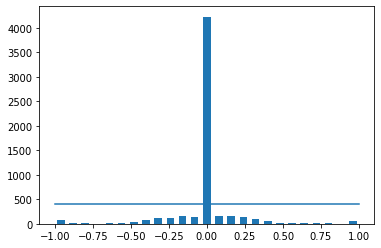

In [7]:
num_bins = 25
samples_per_bin=400
hist,bins=np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:])*0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])),(samples_per_bin, samples_per_bin))

total_data: 5684
removed: 3825
remaining: 1859


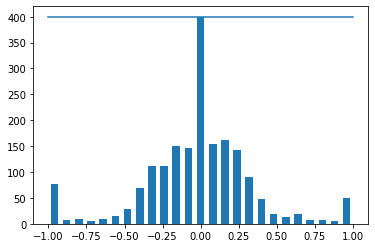

In [8]:
print('total_data:', len(data))
remove_list= []
for j in range(num_bins):
  list_= []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_= list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))
hist,_ =np.histogram(data['steering'], num_bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])),(samples_per_bin, samples_per_bin))

In [9]:
def load_img_steering(datadir, df):
  image_path= []
  steering= []
  for i in range(len(data)):
    indexed_data= data.iloc[i]
    center, left, right= indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings  = load_img_steering(datadir + '/IMG', data)

 

In [10]:
X_train, X_valid, y_train, y_valid= train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples:{}\nValid Samples:{}'.format(len(X_train), len(X_valid)))

Training Samples:1487
Valid Samples:372


Text(0.5, 1.0, 'Validation set')

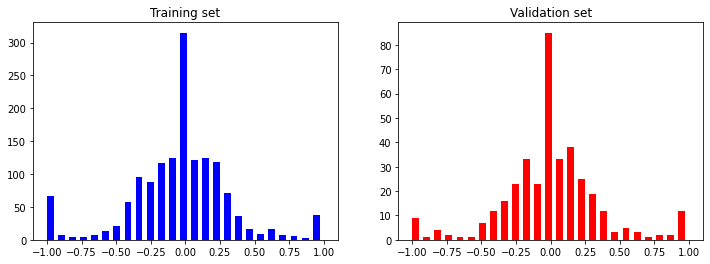

In [11]:
fig, axes= plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red' )
axes[1].set_title('Validation set')

In [12]:
def img_preprocess(img):
  img= mpimg.imread(img)
  img= img[60:135, :, :]
  img= cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img=cv2.GaussianBlur(img, (3,3), 0)
  img=cv2.resize(img, (200,66))
  img=img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

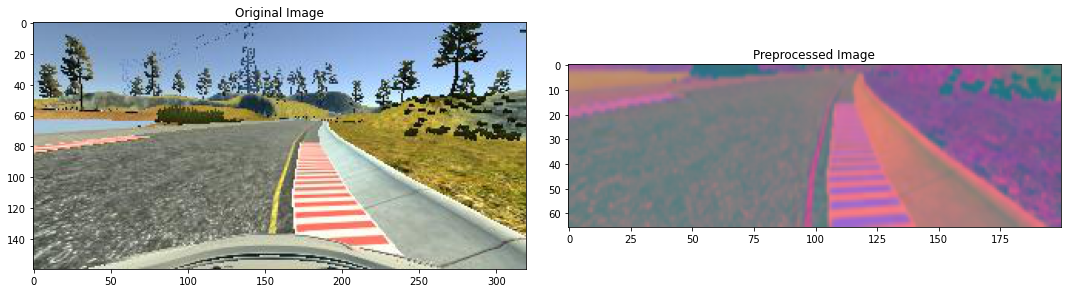

In [13]:
image = image_paths[150]
original_image= mpimg.imread(image)
preprocessed_image= img_preprocess(image)

fig, axs =plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [14]:
X_train=np.array(list(map(img_preprocess, X_train)))
X_valid=np.array(list(map(img_preprocess, X_valid)))

(1487, 66, 200, 3)


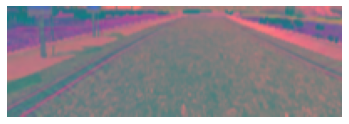

In [15]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [16]:
def nvidia_model():
  model=Sequential()
  model.add(Convolution2D(24, (5, 5), strides=(2,2), input_shape=(66,200,3), activation='elu'))
  model.add(Convolution2D(36, (5, 5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(48, (5, 5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(64, (3, 3), activation='elu'))
  model.add(Convolution2D(64, (3, 3), activation='elu'))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))

  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))

  optimizer= Adam(lr=0.001)
  model.compile(loss='mse', optimizer=optimizer)
  return model


In [17]:
model= nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

Epoch 1/30
15/15 [==============================] - 12s 64ms/step - loss: 0.6682 - val_loss: 0.1390
Epoch 2/30
15/15 [==============================] - 0s 25ms/step - loss: 0.2075 - val_loss: 0.1191
Epoch 3/30
15/15 [==============================] - 0s 24ms/step - loss: 0.1610 - val_loss: 0.1153
Epoch 4/30
15/15 [==============================] - 0s 24ms/step - loss: 0.1396 - val_loss: 0.1128
Epoch 5/30
15/15 [==============================] - 0s 25ms/step - loss: 0.1275 - val_loss: 0.1040
Epoch 6/30
15/15 [==============================] - 0s 25ms/step - loss: 0.1224 - val_loss: 0.0989
Epoch 7/30
15/15 [==============================] - 0s 25ms/step - loss: 0.1161 - val_loss: 0.1088
Epoch 8/30
15/15 [==============================] - 0s 24ms/step - loss: 0.1131 - val_loss: 0.0910
Epoch 9/30
15/15 [==============================] - 0s 26ms/step - loss: 0.1048 - val_loss: 0.0849
Epoch 10/30
15/15 [==============================] - 0s 25ms/step - loss: 0.1066 - val_loss: 0.0840
Epoch 11

Text(0.5, 0, 'Epoch')

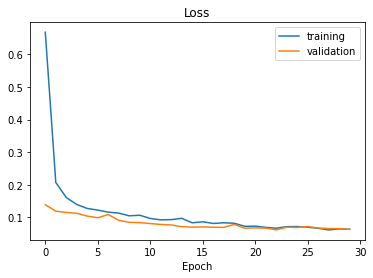

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [20]:
model.save('model.h5')

In [21]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>